# Computer Vision CSCI-GA.2272-001 Assignment 1, part 1.

Fall 2021 semester.

Due date: **September 30th 2021.**

## Introduction

This assignment is an introduction to using PyTorch for training simple neural net models. Two different datasets will be used: 
- MNIST digits [handwritten digits]
- CIFAR-10 [32x32 resolution color images of 10 object classes].

## Requirements

You should perform this assignment in PyTorch by modifying this ipython notebook (File-->Save a copy...).

To install PyTorch, follow instructions at http://pytorch.org/

Please submit your assignment by uploading this iPython notebook to Brightspace.

## Warmup [5%]

It is always good practice to visually inspect your data before trying to train a model, since it lets you check for problems and get a feel for the task at hand.

MNIST is a dataset of 70,000 grayscale hand-written digits (0 through 9).
60,000 of these are training images. 10,000 are a held out test set. 

CIFAR-10 is a dataset of 60,000 color images (32 by 32 resolution) across 10 classes
(airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck). 
The train/test split is 50k/10k.

Use `matplotlib` and ipython notebook's visualization capabilities to display some of these images.
[See this PyTorch tutorial page](http://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html#sphx-glr-beginner-blitz-cifar10-tutorial-py) for hints on how to achieve this.

** Relevant Cell: "Data Loading" **

## Training a Single Layer Network on MNIST [10%]

Start by running the training on MNIST.
By default if you run this notebook successfully, it will train on MNIST.

This will initialize a single layer model train it on the 60,000 MNIST training images for 1 epoch (passes through the training data). 

The loss function [cross_entropy](http://pytorch.org/docs/master/nn.html?highlight=cross_entropy#torch.nn.functional.cross_entropy) computes a Logarithm of the Softmax on the output of the neural network, and then computes the negative log-likelihood w.r.t. the given `target`.

The default values for the learning rate, batch size and number of epochs are given in the "options" cell of this notebook. 
Unless otherwise specified, use the default values throughout this assignment. 

Note the decrease in training loss and corresponding decrease in validation errors.

Paste the output into your report.
(a): Add code to plot out the network weights as images (one for each output, of size 28 by 28) after the last epoch. Grab a screenshot of the figure and include it in your report. (Hint threads: [#1](https://discuss.pytorch.org/t/understanding-deep-network-visualize-weights/2060/2?u=smth) [#2](https://github.com/pytorch/vision#utils) )

(b): Reduce the number of training examples to just 50. [Hint: limit the iterator in the `train` function]. 
Paste the output into your report and explain what is happening to the model.

## Training a Multi-Layer Network on MNIST [10%]

- Add an extra layer to the network with 1000 hidden units and a `tanh` non-linearity. [Hint: modify the `Net` class]. Train the model for 10 epochs and save the output into your report.
-  Now set the learning rate to 10 and observe what happens during training. Save the output in your report and give a brief explanation

## Training a Convolutional Network on CIFAR [25%]

To change over to the CIFAR-10 dataset, change the `options` cell's `dataset` variable to `'cifar10'`.

- Create a convolutional network with the following architecture:
  - Convolution with 5 by 5 filters, 16 feature maps + Tanh nonlinearity.
  - 2 by 2 max pooling (non-overlapping).
  - Convolution with 5 by 5 filters, 128 feature maps + Tanh nonlinearity.
  - 2 by 2 max pooling (non-overlapping).
  - Flatten to vector.
  - Linear layer with 64 hidden units + Tanh nonlinearity.
  - Linear layer to 10 output units.

Train it for 20 epochs on the CIFAR-10 training set and copy the output
into your report, along with a image of the first layer filters.

Hints: [Follow the first PyTorch tutorial](http://pytorch.org/tutorials/beginner/blitz/neural_networks_tutorial.html#sphx-glr-beginner-blitz-neural-networks-tutorial-py) or look at the [MNIST example](https://github.com/pytorch/examples/tree/master/mnist). Also, you may find training is faster if you use a GPU runtime (RunTime-->Change Runtime Type-->GPU). 

- Give a breakdown of the parameters within the above model, and the overall number.

In [ ]:
from __future__ import print_function
import argparse
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

from torch.autograd import Variable
# My Code
import torchvision
import matplotlib.pyplot as plt
import numpy as np
# My Code

In [ ]:
# options
dataset = 'mnist' # options: 'mnist' | 'cifar10'
batch_size = 64   # input batch size for training
epochs = 10       # number of epochs to train
lr = 0.01        # learning rate

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


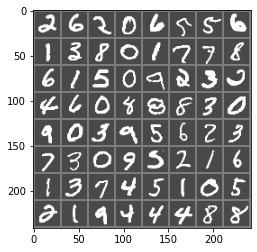

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


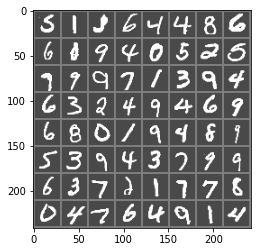

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


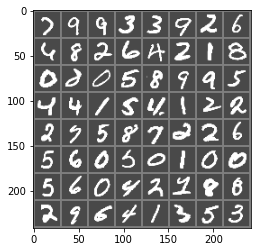

In [ ]:
# Data Loading
# Warning: this cell might take some time when you run it for the first time, 
#          because it will download the datasets from the internet
if dataset == 'mnist':
    data_transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,))
    ])
    trainset = datasets.MNIST(root='.', train=True, download=True, transform=data_transform)
    testset = datasets.MNIST(root='.', train=False, download=True, transform=data_transform)

elif dataset == 'cifar10':
    data_transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
    ])
    trainset = datasets.CIFAR10(root='.', train=True, download=True, transform=data_transform)
    testset = datasets.CIFAR10(root='.', train=False, download=True, transform=data_transform)

train_loader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=0)
test_loader  = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=0)

# My Code

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(train_loader)
images, labels = dataiter.next()
# dataiter2 = iter(train_loader)
# images2, labels = dataiter2.next()
# dataiter3 = iter(train_loader)
# images3, labels = dataiter3.next()

# show images
imshow(torchvision.utils.make_grid(images))
# imshow(torchvision.utils.make_grid(images2))
# imshow(torchvision.utils.make_grid(images3))
# print labels
# print(' '.join('%5s' % classes[labels[j]] for j in range(batch_size)))
# Use matplotlib and ipython notebook's visualization capabilities to display some of these images. See this PyTorch tutorial page for hints on how to achieve this.
# My Code

In [ ]:
## network and optimizer
if dataset == 'mnist':
    num_inputs = 784
elif dataset == 'cifar10':
    num_inputs = 3072

num_outputs = 10 # same for both CIFAR10 and MNIST, both have 10 classes as outputs

class Net(nn.Module):
    def __init__(self, num_inputs, num_outputs):
        super(Net, self).__init__()
        self.linear = nn.Linear(num_inputs, num_outputs)
# My Code
        # self.linear = nn.Linear(num_inputs, 1000)
        # self.linear2 = nn.Linear(1000, num_outputs)
# My Code
    def forward(self, input):
        input = input.view(-1, num_inputs) # reshape input to batch x num_inputs
        output = self.linear(input)
        return output
# My Code        
        #output = self.linear(input)
        #output2 = self.linear2(output1)
        # return output2
# My Code
network = Net(num_inputs, num_outputs)
optimizer = optim.SGD(network.parameters(), lr=lr)
# My Code
# for m in model.modules():
#     if isinstance(m, nn.Conv2d):
#         print(m.weights.data)
# My Code
# (a): Add code to plot out the network weights as images (one for each output, of size 28 by 28) after the last epoch. Grab a screenshot of the figure and include it in your report. (Hint threads: #1 #2)

# (b): Reduce the number of training examples to just 50. [Hint: limit the iterator in the train function]. Paste the output into your report and explain what is happening to the model.

In [ ]:
def train(epoch):
    network.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = Variable(data), Variable(target)
        optimizer.zero_grad()#初始化清零
        output = network(data)#这是网络结构下面一行或者l
        loss = F.cross_entropy(output, target)
        loss.backward()#这个
        optimizer.step()
        if batch_idx % 100 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))
            # train 
def test():
    network.eval()
    test_loss = 0
    correct = 0
    for data, target in test_loader:
        #data, target = Variable(data, volatile=True), Variable(target)
        output = network(data)
        test_loss += F.cross_entropy(output, target, reduction='sum').item() # sum up batch loss
        #test_loss += F.cross_entropy(output, target, sum=True).item() # sum up batch loss
        pred = output.data.max(1, keepdim=True)[1] # get the index of the max log-probability
        correct += pred.eq(target.data.view_as(pred)).cpu().sum()

    test_loss /= len(test_loader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))
# Create a convolutional network with the following architecture:
# Convolution with 5 by 5 filters, 16 feature maps + Tanh nonlinearity.
# 2 by 2 max pooling (non-overlapping).
# Convolution with 5 by 5 filters, 128 feature maps + Tanh nonlinearity.
# 2 by 2 max pooling (non-overlapping).
# Flatten to vector.
# Linear layer with 64 hidden units + Tanh nonlinearity.
# Linear layer to 10 output units.
# Train it for 20 epochs on the CIFAR-10 training set and copy the output into your report, along with a image of the first layer filters.

# My Code
#     def __init__(self):
#         super(Net, self).__init__()
#         self.conv1 = nn.Conv2d(3, 10, kernel_size=5)
#         self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
#         self.conv2_drop = nn.Dropout2d()
#         self.fc1 = nn.Linear(500, 50)
#         self.fc2 = nn.Linear(50, nclasses)
# My Code

In [ ]:
for epoch in range(1, epochs + 1):
    train(epoch)
    test()

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.357631
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.520245
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.516170
Train Epoch: 1 [19200/60000 (32%)]	Loss: 0.349689
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.546544
Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.395630
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.310074
Train Epoch: 1 [44800/60000 (75%)]	Loss: 0.311173
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.458440
Train Epoch: 1 [57600/60000 (96%)]	Loss: 0.445644

Test set: Average loss: 0.3319, Accuracy: 9076/10000 (91%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 0.440486
Train Epoch: 2 [6400/60000 (11%)]	Loss: 0.231022
Train Epoch: 2 [12800/60000 (21%)]	Loss: 0.272035
Train Epoch: 2 [19200/60000 (32%)]	Loss: 0.216589
Train Epoch: 2 [25600/60000 (43%)]	Loss: 0.344975
Train Epoch: 2 [32000/60000 (53%)]	Loss: 0.455259
Train Epoch: 2 [38400/60000 (64%)]	Loss: 0.194555
Train Epoch: 2 [44800/60000 (75%)]	Loss: 0.361104
Train Epoch: 2 [51200/60000 (85%)]	Loss: 0.342105
T

In [ ]:
# plot out weights
def vistensor(tensor, ch=0, allkernels=True, nrow=10, padding=1): 
    n,c,w,h = tensor.shape
    if allkernels: tensor = tensor.view(n*c,-1,w,h )
    elif c != 3: tensor = tensor[:,ch,:,:].unsqueeze(dim=1)
        
    rows = np.min( (tensor.shape[0]//nrow + 1, 64 )  )    
    grid = torchvision.utils.make_grid(tensor, nrow=nrow, normalize=True, padding=padding)
    plt.figure( figsize=(nrow,rows) )
    plt.imshow(grid.numpy().transpose((1, 2, 0)))

def savetensor(tensor, filename, ch=0, allkernels=False, nrow=10, padding=2):
    n,c,w,h = tensor.shape
    if allkernels: tensor = tensor.view(n*c,-1,w,h )
    elif c != 3: tensor = tensor[:,ch,:,:].unsqueeze(dim=1)    
    torchvision.utils.save_image(tensor, filename, nrow=nrow )

odict_keys(['linear.weight', 'linear.bias'])
torch.Size([10, 784])
torch.Size([10, 1, 28, 28])


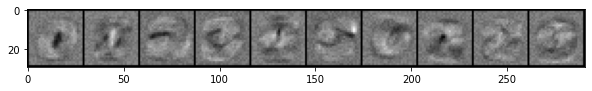

In [ ]:
print(network.state_dict().keys())
linear_weights = network.state_dict()['linear.weight']
print(linear_weights.size())

weights = torch.reshape(linear_weights,(10,1,28,28))
print(weights.size())

vistensor(weights, ch=0, allkernels=True)
savetensor(weights,'linear_weights.png', allkernels=True)

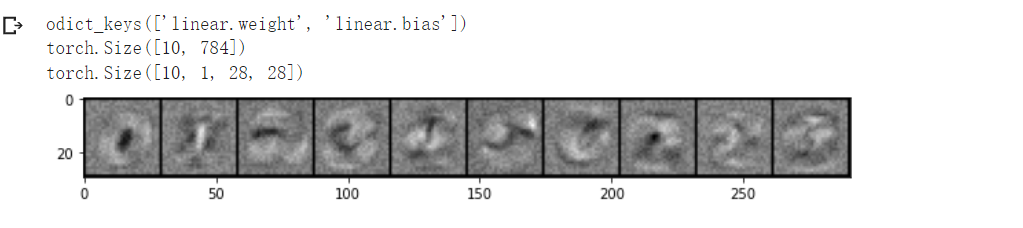

In [ ]:
train_loader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=False, num_workers=0)
test_loader  = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=0)
network2nd = Net(num_inputs, num_outputs)
optimizer2nd = optim.SGD(network2nd.parameters(), lr=lr)

In [ ]:
def train2nd(epoch):
    network2nd.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = Variable(data[:50]), Variable(target[:50])
        optimizer2nd.zero_grad()
        output = network2nd(data)
        loss = F.cross_entropy(output, target)
        loss.backward()
        optimizer2nd.step()
        if batch_idx % 10 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))
        if batch_idx == 0:
            break

def test2nd():
    network2nd.eval()
    test_loss = 0
    correct = 0
    for data, target in test_loader:
        data, target = Variable(data, volatile=True), Variable(target)
        output = network2nd(data)
        test_loss += F.cross_entropy(output, target, reduction='sum').item() # sum up batch loss
        pred = output.data.max(1, keepdim=True)[1] 
        correct += pred.eq(target.data.view_as(pred)).cpu().sum()

    test_loss /= len(test_loader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

In [ ]:
for epoch in range(1, epochs + 1):
    train2nd(epoch)
    test2nd()

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.302428


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.



Test set: Average loss: 2.2380, Accuracy: 1865/10000 (19%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 2.102602

Test set: Average loss: 2.1421, Accuracy: 2605/10000 (26%)

Train Epoch: 3 [0/60000 (0%)]	Loss: 1.932519

Test set: Average loss: 2.0586, Accuracy: 3263/10000 (33%)

Train Epoch: 4 [0/60000 (0%)]	Loss: 1.784405

Test set: Average loss: 1.9846, Accuracy: 3713/10000 (37%)

Train Epoch: 5 [0/60000 (0%)]	Loss: 1.653638

Test set: Average loss: 1.9184, Accuracy: 4056/10000 (41%)

Train Epoch: 6 [0/60000 (0%)]	Loss: 1.537238

Test set: Average loss: 1.8590, Accuracy: 4282/10000 (43%)

Train Epoch: 7 [0/60000 (0%)]	Loss: 1.433077

Test set: Average loss: 1.8054, Accuracy: 4469/10000 (45%)

Train Epoch: 8 [0/60000 (0%)]	Loss: 1.339504

Test set: Average loss: 1.7570, Accuracy: 4644/10000 (46%)

Train Epoch: 9 [0/60000 (0%)]	Loss: 1.255162

Test set: Average loss: 1.7132, Accuracy: 4776/10000 (48%)

Train Epoch: 10 [0/60000 (0%)]	Loss: 1.178911

Test set: Average loss: 1.6733, Accuracy: 49

odict_keys(['linear.weight', 'linear.bias'])
torch.Size([10, 784])
torch.Size([10, 1, 28, 28])


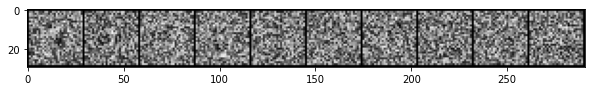

In [ ]:
print(network.state_dict().keys())
linear_weights = network2nd.state_dict()['linear.weight']
print(linear_weights.size())

weights = torch.reshape(linear_weights,(10,1,28,28))
print(weights.size())

vistensor(weights, ch=0, allkernels=True)
savetensor(weights,'linear_weights_50.png', allkernels=True)

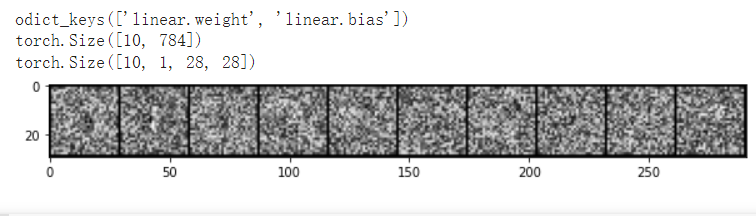

Training a Multi-Layer Network on MNIST [10%]

In [ ]:
if dataset == 'mnist':
    num_inputs = 784
elif dataset == 'cifar10':
    num_inputs = 3072

num_outputs = 10 # same for both CIFAR10 and MNIST, both have 10 classes as outputs
hidden_layer_n = 1000

class MultiLayerNet(nn.Module):
    def __init__(self, num_inputs, num_outputs):
        super(MultiLayerNet, self).__init__()
        self.linear1 = nn.Linear(num_inputs, hidden_layer_n)
        self.linear2 = nn.Linear(hidden_layer_n, num_outputs)

    def forward(self, input):
        input = input.view(-1, num_inputs) # reshape input to batch x num_inputs
        output = self.linear1(input)
        output = nn.functional.tanh(output)
        output = self.linear2(output)
        
        return output

multilayer_network = MultiLayerNet(num_inputs, num_outputs)
multilayer_optimizer = optim.SGD(multilayer_network.parameters(), lr=lr)

In [ ]:
def train_ml(epoch):
    multilayer_network.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = Variable(data), Variable(target)
        multilayer_optimizer.zero_grad()
        output = multilayer_network(data)
        loss = F.cross_entropy(output, target)
        loss.backward()
        multilayer_optimizer.step()
        if batch_idx % 100 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                # 100. * batch_idx / len(train_loader), loss.data[0]))
                100. * batch_idx / len(train_loader), loss.data))

def test_ml():
    multilayer_network.eval()
    test_loss = 0
    correct = 0
    for data, target in test_loader:
        data, target = Variable(data, volatile=True), Variable(target)
        output = multilayer_network(data)
        # test_loss += F.cross_entropy(output, target, size_average=False).data[0] # sum up batch loss
        test_loss += F.cross_entropy(output, target, size_average=False).data # sum up batch loss
        pred = output.data.max(1, keepdim=True)[1] # get the index of the max log-probability
        correct += pred.eq(target.data.view_as(pred)).cpu().sum()

    test_loss /= len(test_loader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

In [ ]:
for epoch in range(1, epochs + 1):
    train_ml(epoch)
    test_ml()

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1794: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Train Epoch: 1 [0/60000 (0%)]	Loss: 2.090163
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.627278
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.516978
Train Epoch: 1 [19200/60000 (32%)]	Loss: 0.485133
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.327449
Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.421925
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.274360
Train Epoch: 1 [44800/60000 (75%)]	Loss: 0.461722
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.429170
Train Epoch: 1 [57600/60000 (96%)]	Loss: 0.429862


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
/usr/local/lib/python3.7/dist-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))



Test set: Average loss: 0.3246, Accuracy: 9067/10000 (91%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 0.267655
Train Epoch: 2 [6400/60000 (11%)]	Loss: 0.277401
Train Epoch: 2 [12800/60000 (21%)]	Loss: 0.246846
Train Epoch: 2 [19200/60000 (32%)]	Loss: 0.339876
Train Epoch: 2 [25600/60000 (43%)]	Loss: 0.232801
Train Epoch: 2 [32000/60000 (53%)]	Loss: 0.342909
Train Epoch: 2 [38400/60000 (64%)]	Loss: 0.205879
Train Epoch: 2 [44800/60000 (75%)]	Loss: 0.401691
Train Epoch: 2 [51200/60000 (85%)]	Loss: 0.351922
Train Epoch: 2 [57600/60000 (96%)]	Loss: 0.424332

Test set: Average loss: 0.2828, Accuracy: 9185/10000 (92%)

Train Epoch: 3 [0/60000 (0%)]	Loss: 0.203387
Train Epoch: 3 [6400/60000 (11%)]	Loss: 0.254634
Train Epoch: 3 [12800/60000 (21%)]	Loss: 0.199330
Train Epoch: 3 [19200/60000 (32%)]	Loss: 0.292486
Train Epoch: 3 [25600/60000 (43%)]	Loss: 0.209364
Train Epoch: 3 [32000/60000 (53%)]	Loss: 0.311666
Train Epoch: 3 [38400/60000 (64%)]	Loss: 0.179265
Train Epoch: 3 [44800/60000 (75%)]	Loss:

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.090163
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.627278
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.516978
Train Epoch: 1 [19200/60000 (32%)]	Loss: 0.485133
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.327449
Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.421925
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.274360
Train Epoch: 1 [44800/60000 (75%)]	Loss: 0.461722
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.429170
Train Epoch: 1 [57600/60000 (96%)]	Loss: 0.429862
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
/usr/local/lib/python3.7/dist-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))

Test set: Average loss: 0.3246, Accuracy: 9067/10000 (91%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 0.267655
Train Epoch: 2 [6400/60000 (11%)]	Loss: 0.277401
Train Epoch: 2 [12800/60000 (21%)]	Loss: 0.246846
Train Epoch: 2 [19200/60000 (32%)]	Loss: 0.339876
Train Epoch: 2 [25600/60000 (43%)]	Loss: 0.232801
Train Epoch: 2 [32000/60000 (53%)]	Loss: 0.342909
Train Epoch: 2 [38400/60000 (64%)]	Loss: 0.205879
Train Epoch: 2 [44800/60000 (75%)]	Loss: 0.401691
Train Epoch: 2 [51200/60000 (85%)]	Loss: 0.351922
Train Epoch: 2 [57600/60000 (96%)]	Loss: 0.424332

Test set: Average loss: 0.2828, Accuracy: 9185/10000 (92%)

Train Epoch: 3 [0/60000 (0%)]	Loss: 0.203387
Train Epoch: 3 [6400/60000 (11%)]	Loss: 0.254634
Train Epoch: 3 [12800/60000 (21%)]	Loss: 0.199330
Train Epoch: 3 [19200/60000 (32%)]	Loss: 0.292486
Train Epoch: 3 [25600/60000 (43%)]	Loss: 0.209364
Train Epoch: 3 [32000/60000 (53%)]	Loss: 0.311666
Train Epoch: 3 [38400/60000 (64%)]	Loss: 0.179265
Train Epoch: 3 [44800/60000 (75%)]	Loss: 0.372818
Train Epoch: 3 [51200/60000 (85%)]	Loss: 0.303605
Train Epoch: 3 [57600/60000 (96%)]	Loss: 0.410763

Test set: Average loss: 0.2609, Accuracy: 9259/10000 (93%)

Train Epoch: 4 [0/60000 (0%)]	Loss: 0.170147
Train Epoch: 4 [6400/60000 (11%)]	Loss: 0.239402
Train Epoch: 4 [12800/60000 (21%)]	Loss: 0.175797
Train Epoch: 4 [19200/60000 (32%)]	Loss: 0.262589
Train Epoch: 4 [25600/60000 (43%)]	Loss: 0.194017
Train Epoch: 4 [32000/60000 (53%)]	Loss: 0.289913
Train Epoch: 4 [38400/60000 (64%)]	Loss: 0.159656
Train Epoch: 4 [44800/60000 (75%)]	Loss: 0.350345
Train Epoch: 4 [51200/60000 (85%)]	Loss: 0.262615
Train Epoch: 4 [57600/60000 (96%)]	Loss: 0.392107

Test set: Average loss: 0.2434, Accuracy: 9316/10000 (93%)

Train Epoch: 5 [0/60000 (0%)]	Loss: 0.146679
Train Epoch: 5 [6400/60000 (11%)]	Loss: 0.224346
Train Epoch: 5 [12800/60000 (21%)]	Loss: 0.159742
Train Epoch: 5 [19200/60000 (32%)]	Loss: 0.239793
Train Epoch: 5 [25600/60000 (43%)]	Loss: 0.179600
Train Epoch: 5 [32000/60000 (53%)]	Loss: 0.271743
Train Epoch: 5 [38400/60000 (64%)]	Loss: 0.142878
Train Epoch: 5 [44800/60000 (75%)]	Loss: 0.330583
Train Epoch: 5 [51200/60000 (85%)]	Loss: 0.227063
Train Epoch: 5 [57600/60000 (96%)]	Loss: 0.372578

Test set: Average loss: 0.2273, Accuracy: 9357/10000 (94%)

Train Epoch: 6 [0/60000 (0%)]	Loss: 0.128088
Train Epoch: 6 [6400/60000 (11%)]	Loss: 0.209045
Train Epoch: 6 [12800/60000 (21%)]	Loss: 0.147234
Train Epoch: 6 [19200/60000 (32%)]	Loss: 0.220696
Train Epoch: 6 [25600/60000 (43%)]	Loss: 0.165328
Train Epoch: 6 [32000/60000 (53%)]	Loss: 0.255262
Train Epoch: 6 [38400/60000 (64%)]	Loss: 0.128214
Train Epoch: 6 [44800/60000 (75%)]	Loss: 0.312709
Train Epoch: 6 [51200/60000 (85%)]	Loss: 0.197860
Train Epoch: 6 [57600/60000 (96%)]	Loss: 0.354415

Test set: Average loss: 0.2121, Accuracy: 9406/10000 (94%)

Train Epoch: 7 [0/60000 (0%)]	Loss: 0.112800
Train Epoch: 7 [6400/60000 (11%)]	Loss: 0.194025
Train Epoch: 7 [12800/60000 (21%)]	Loss: 0.137043
Train Epoch: 7 [19200/60000 (32%)]	Loss: 0.203915
Train Epoch: 7 [25600/60000 (43%)]	Loss: 0.151614
Train Epoch: 7 [32000/60000 (53%)]	Loss: 0.239749
Train Epoch: 7 [38400/60000 (64%)]	Loss: 0.115471
Train Epoch: 7 [44800/60000 (75%)]	Loss: 0.296460
Train Epoch: 7 [51200/60000 (85%)]	Loss: 0.175623
Train Epoch: 7 [57600/60000 (96%)]	Loss: 0.338433

Test set: Average loss: 0.1981, Accuracy: 9445/10000 (94%)

Train Epoch: 8 [0/60000 (0%)]	Loss: 0.100117
Train Epoch: 8 [6400/60000 (11%)]	Loss: 0.179900
Train Epoch: 8 [12800/60000 (21%)]	Loss: 0.128631
Train Epoch: 8 [19200/60000 (32%)]	Loss: 0.188773
Train Epoch: 8 [25600/60000 (43%)]	Loss: 0.138897
Train Epoch: 8 [32000/60000 (53%)]	Loss: 0.225026
Train Epoch: 8 [38400/60000 (64%)]	Loss: 0.104414
Train Epoch: 8 [44800/60000 (75%)]	Loss: 0.281627
Train Epoch: 8 [51200/60000 (85%)]	Loss: 0.159347
Train Epoch: 8 [57600/60000 (96%)]	Loss: 0.324501

Test set: Average loss: 0.1853, Accuracy: 9475/10000 (95%)

Train Epoch: 9 [0/60000 (0%)]	Loss: 0.089563
Train Epoch: 9 [6400/60000 (11%)]	Loss: 0.167065
Train Epoch: 9 [12800/60000 (21%)]	Loss: 0.121639
Train Epoch: 9 [19200/60000 (32%)]	Loss: 0.174878
Train Epoch: 9 [25600/60000 (43%)]	Loss: 0.127402
Train Epoch: 9 [32000/60000 (53%)]	Loss: 0.211140
Train Epoch: 9 [38400/60000 (64%)]	Loss: 0.094777
Train Epoch: 9 [44800/60000 (75%)]	Loss: 0.267972
Train Epoch: 9 [51200/60000 (85%)]	Loss: 0.147310
Train Epoch: 9 [57600/60000 (96%)]	Loss: 0.312089

Test set: Average loss: 0.1738, Accuracy: 9513/10000 (95%)

Train Epoch: 10 [0/60000 (0%)]	Loss: 0.080735
Train Epoch: 10 [6400/60000 (11%)]	Loss: 0.155671
Train Epoch: 10 [12800/60000 (21%)]	Loss: 0.115764
Train Epoch: 10 [19200/60000 (32%)]	Loss: 0.162028
Train Epoch: 10 [25600/60000 (43%)]	Loss: 0.117174
Train Epoch: 10 [32000/60000 (53%)]	Loss: 0.198167
Train Epoch: 10 [38400/60000 (64%)]	Loss: 0.086343
Train Epoch: 10 [44800/60000 (75%)]	Loss: 0.255246
Train Epoch: 10 [51200/60000 (85%)]	Loss: 0.138135
Train Epoch: 10 [57600/60000 (96%)]	Loss: 0.300651

Test set: Average loss: 0.1637, Accuracy: 9535/10000 (95%)

In [ ]:
lr = 10.0

multilayer_network = MultiLayerNet(num_inputs, num_outputs)
multilayer_optimizer = optim.SGD(multilayer_network.parameters(), lr=lr)

for epoch in range(1, epochs + 1):
    train_ml(epoch)
    test_ml()

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1794: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Train Epoch: 1 [0/60000 (0%)]	Loss: 2.412948
Train Epoch: 1 [6400/60000 (11%)]	Loss: 1590.261353
Train Epoch: 1 [12800/60000 (21%)]	Loss: 493.944824
Train Epoch: 1 [19200/60000 (32%)]	Loss: 416.779144
Train Epoch: 1 [25600/60000 (43%)]	Loss: 179.190094
Train Epoch: 1 [32000/60000 (53%)]	Loss: 540.443604
Train Epoch: 1 [38400/60000 (64%)]	Loss: 261.549316
Train Epoch: 1 [44800/60000 (75%)]	Loss: 275.844543
Train Epoch: 1 [51200/60000 (85%)]	Loss: 525.534912
Train Epoch: 1 [57600/60000 (96%)]	Loss: 214.375961


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
/usr/local/lib/python3.7/dist-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))



Test set: Average loss: 203.8306, Accuracy: 6061/10000 (61%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 198.812180
Train Epoch: 2 [6400/60000 (11%)]	Loss: 426.706390
Train Epoch: 2 [12800/60000 (21%)]	Loss: 145.903015
Train Epoch: 2 [19200/60000 (32%)]	Loss: 237.723038
Train Epoch: 2 [25600/60000 (43%)]	Loss: 317.060699
Train Epoch: 2 [32000/60000 (53%)]	Loss: 279.581970
Train Epoch: 2 [38400/60000 (64%)]	Loss: 449.907806
Train Epoch: 2 [44800/60000 (75%)]	Loss: 299.660522
Train Epoch: 2 [51200/60000 (85%)]	Loss: 283.080170
Train Epoch: 2 [57600/60000 (96%)]	Loss: 315.445312

Test set: Average loss: 107.6908, Accuracy: 7377/10000 (74%)

Train Epoch: 3 [0/60000 (0%)]	Loss: 62.945869
Train Epoch: 3 [6400/60000 (11%)]	Loss: 274.748108
Train Epoch: 3 [12800/60000 (21%)]	Loss: 224.771881
Train Epoch: 3 [19200/60000 (32%)]	Loss: 233.997498
Train Epoch: 3 [25600/60000 (43%)]	Loss: 295.588318
Train Epoch: 3 [32000/60000 (53%)]	Loss: 234.198410
Train Epoch: 3 [38400/60000 (64%)]	Loss: 351.589142
Tra

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.412948
Train Epoch: 1 [6400/60000 (11%)]	Loss: 1590.261353
Train Epoch: 1 [12800/60000 (21%)]	Loss: 493.944824
Train Epoch: 1 [19200/60000 (32%)]	Loss: 416.779144
Train Epoch: 1 [25600/60000 (43%)]	Loss: 179.190094
Train Epoch: 1 [32000/60000 (53%)]	Loss: 540.443604
Train Epoch: 1 [38400/60000 (64%)]	Loss: 261.549316
Train Epoch: 1 [44800/60000 (75%)]	Loss: 275.844543
Train Epoch: 1 [51200/60000 (85%)]	Loss: 525.534912
Train Epoch: 1 [57600/60000 (96%)]	Loss: 214.375961
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
/usr/local/lib/python3.7/dist-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))

Test set: Average loss: 203.8306, Accuracy: 6061/10000 (61%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 198.812180
Train Epoch: 2 [6400/60000 (11%)]	Loss: 426.706390
Train Epoch: 2 [12800/60000 (21%)]	Loss: 145.903015
Train Epoch: 2 [19200/60000 (32%)]	Loss: 237.723038
Train Epoch: 2 [25600/60000 (43%)]	Loss: 317.060699
Train Epoch: 2 [32000/60000 (53%)]	Loss: 279.581970
Train Epoch: 2 [38400/60000 (64%)]	Loss: 449.907806
Train Epoch: 2 [44800/60000 (75%)]	Loss: 299.660522
Train Epoch: 2 [51200/60000 (85%)]	Loss: 283.080170
Train Epoch: 2 [57600/60000 (96%)]	Loss: 315.445312

Test set: Average loss: 107.6908, Accuracy: 7377/10000 (74%)

Train Epoch: 3 [0/60000 (0%)]	Loss: 62.945869
Train Epoch: 3 [6400/60000 (11%)]	Loss: 274.748108
Train Epoch: 3 [12800/60000 (21%)]	Loss: 224.771881
Train Epoch: 3 [19200/60000 (32%)]	Loss: 233.997498
Train Epoch: 3 [25600/60000 (43%)]	Loss: 295.588318
Train Epoch: 3 [32000/60000 (53%)]	Loss: 234.198410
Train Epoch: 3 [38400/60000 (64%)]	Loss: 351.589142
Train Epoch: 3 [44800/60000 (75%)]	Loss: 186.080933
Train Epoch: 3 [51200/60000 (85%)]	Loss: 228.999649
Train Epoch: 3 [57600/60000 (96%)]	Loss: 186.490814

Test set: Average loss: 118.1188, Accuracy: 7450/10000 (74%)

Train Epoch: 4 [0/60000 (0%)]	Loss: 100.661461
Train Epoch: 4 [6400/60000 (11%)]	Loss: 194.770370
Train Epoch: 4 [12800/60000 (21%)]	Loss: 122.384155
Train Epoch: 4 [19200/60000 (32%)]	Loss: 104.970940
Train Epoch: 4 [25600/60000 (43%)]	Loss: 75.335175
Train Epoch: 4 [32000/60000 (53%)]	Loss: 210.238022
Train Epoch: 4 [38400/60000 (64%)]	Loss: 104.052628
Train Epoch: 4 [44800/60000 (75%)]	Loss: 110.659233
Train Epoch: 4 [51200/60000 (85%)]	Loss: 272.702820
Train Epoch: 4 [57600/60000 (96%)]	Loss: 212.396149

Test set: Average loss: 158.1824, Accuracy: 7189/10000 (72%)

Train Epoch: 5 [0/60000 (0%)]	Loss: 114.100822
Train Epoch: 5 [6400/60000 (11%)]	Loss: 199.209229
Train Epoch: 5 [12800/60000 (21%)]	Loss: 261.424835
Train Epoch: 5 [19200/60000 (32%)]	Loss: 240.616531
Train Epoch: 5 [25600/60000 (43%)]	Loss: 70.378525
Train Epoch: 5 [32000/60000 (53%)]	Loss: 93.283539
Train Epoch: 5 [38400/60000 (64%)]	Loss: 76.940338
Train Epoch: 5 [44800/60000 (75%)]	Loss: 230.378983
Train Epoch: 5 [51200/60000 (85%)]	Loss: 210.608063
Train Epoch: 5 [57600/60000 (96%)]	Loss: 122.328621

Test set: Average loss: 152.9763, Accuracy: 7140/10000 (71%)

Train Epoch: 6 [0/60000 (0%)]	Loss: 160.656860
Train Epoch: 6 [6400/60000 (11%)]	Loss: 103.959572
Train Epoch: 6 [12800/60000 (21%)]	Loss: 147.082550
Train Epoch: 6 [19200/60000 (32%)]	Loss: 150.170898
Train Epoch: 6 [25600/60000 (43%)]	Loss: 77.885460
Train Epoch: 6 [32000/60000 (53%)]	Loss: 123.376205
Train Epoch: 6 [38400/60000 (64%)]	Loss: 58.351067
Train Epoch: 6 [44800/60000 (75%)]	Loss: 114.297607
Train Epoch: 6 [51200/60000 (85%)]	Loss: 89.359894
Train Epoch: 6 [57600/60000 (96%)]	Loss: 135.787125

Test set: Average loss: 77.5515, Accuracy: 8146/10000 (81%)

Train Epoch: 7 [0/60000 (0%)]	Loss: 69.069740
Train Epoch: 7 [6400/60000 (11%)]	Loss: 134.772034
Train Epoch: 7 [12800/60000 (21%)]	Loss: 117.421722
Train Epoch: 7 [19200/60000 (32%)]	Loss: 218.863892
Train Epoch: 7 [25600/60000 (43%)]	Loss: 167.780807
Train Epoch: 7 [32000/60000 (53%)]	Loss: 94.551147
Train Epoch: 7 [38400/60000 (64%)]	Loss: 108.377251
Train Epoch: 7 [44800/60000 (75%)]	Loss: 141.974640
Train Epoch: 7 [51200/60000 (85%)]	Loss: 182.955582
Train Epoch: 7 [57600/60000 (96%)]	Loss: 242.474884

Test set: Average loss: 237.1537, Accuracy: 6693/10000 (67%)

Train Epoch: 8 [0/60000 (0%)]	Loss: 179.474976
Train Epoch: 8 [6400/60000 (11%)]	Loss: 471.268982
Train Epoch: 8 [12800/60000 (21%)]	Loss: 519.457947
Train Epoch: 8 [19200/60000 (32%)]	Loss: 195.719421
Train Epoch: 8 [25600/60000 (43%)]	Loss: 262.527954
Train Epoch: 8 [32000/60000 (53%)]	Loss: 323.297150
Train Epoch: 8 [38400/60000 (64%)]	Loss: 94.073975
Train Epoch: 8 [44800/60000 (75%)]	Loss: 131.167709
Train Epoch: 8 [51200/60000 (85%)]	Loss: 233.742813
Train Epoch: 8 [57600/60000 (96%)]	Loss: 174.941345

Test set: Average loss: 115.4809, Accuracy: 7651/10000 (77%)

Train Epoch: 9 [0/60000 (0%)]	Loss: 90.119850
Train Epoch: 9 [6400/60000 (11%)]	Loss: 135.284149
Train Epoch: 9 [12800/60000 (21%)]	Loss: 129.906265
Train Epoch: 9 [19200/60000 (32%)]	Loss: 129.877502
Train Epoch: 9 [25600/60000 (43%)]	Loss: 155.314331
Train Epoch: 9 [32000/60000 (53%)]	Loss: 209.414871
Train Epoch: 9 [38400/60000 (64%)]	Loss: 185.301025
Train Epoch: 9 [44800/60000 (75%)]	Loss: 150.451370
Train Epoch: 9 [51200/60000 (85%)]	Loss: 229.518600
Train Epoch: 9 [57600/60000 (96%)]	Loss: 150.537964

Test set: Average loss: 103.0909, Accuracy: 7778/10000 (78%)

Train Epoch: 10 [0/60000 (0%)]	Loss: 116.858948
Train Epoch: 10 [6400/60000 (11%)]	Loss: 197.882843
Train Epoch: 10 [12800/60000 (21%)]	Loss: 259.087830
Train Epoch: 10 [19200/60000 (32%)]	Loss: 84.514328
Train Epoch: 10 [25600/60000 (43%)]	Loss: 126.515518
Train Epoch: 10 [32000/60000 (53%)]	Loss: 62.737728
Train Epoch: 10 [38400/60000 (64%)]	Loss: 157.147598
Train Epoch: 10 [44800/60000 (75%)]	Loss: 83.929184
Train Epoch: 10 [51200/60000 (85%)]	Loss: 155.114441
Train Epoch: 10 [57600/60000 (96%)]	Loss: 284.093506

Test set: Average loss: 238.4037, Accuracy: 6488/10000 (65%)

Training a Convolutional Network on CIFAR [25%]

In [ ]:
lr = 0.01
epochs = 20
dataset = 'cifar10'

In [ ]:
if dataset == 'cifar10':
    data_transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
    ])
    trainset = datasets.CIFAR10(root='.', train=True, download=True, transform=data_transform)
    testset = datasets.CIFAR10(root='.', train=False, download=True, transform=data_transform)
    classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
train_loader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=0)
test_loader  = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=0)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./cifar-10-python.tar.gz to .
Files already downloaded and verified


In [ ]:
if dataset == 'cifar10':
    num_inputs = 3072

num_outputs = 10 # same for both CIFAR10 and MNIST, both have 10 classes as outputs

class CNN(nn.Module):

    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(3,16,5)
        self.conv2 = nn.Conv2d(16,128,5)
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(128 * 5 * 5, 64) 
        self.fc2 = nn.Linear(64, 10)

    def forward(self, x):
        # Max pooling over a (2, 2) window
        x = F.max_pool2d(F.tanh(self.conv1(x)), (2, 2))
        # If the size is a square you can only specify a single number
        x = F.max_pool2d(F.tanh(self.conv2(x)), (2,2))
        x = x.view(-1, self.num_flat_features(x))
        x = F.tanh(self.fc1(x))
        x = self.fc2(x)
        return x

    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features
convolutional_neural_network = CNN()
cnn_optimizer = optim.SGD(convolutional_neural_network.parameters(), lr=lr)

In [ ]:
def train_CNN(epoch):
    convolutional_neural_network.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = Variable(data), Variable(target)
        cnn_optimizer.zero_grad()
        output = convolutional_neural_network(data)
        loss = F.cross_entropy(output, target)
        loss.backward()
        cnn_optimizer.step()
        if batch_idx % 100 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.data))

def test_CNN():
    convolutional_neural_network.eval()
    test_loss = 0
    correct = 0
    for data, target in test_loader:
        data, target = Variable(data, volatile=True), Variable(target)
        output = convolutional_neural_network(data)
        test_loss += F.cross_entropy(output, target, size_average=False).data # sum up batch loss
        pred = output.data.max(1, keepdim=True)[1] # get the index of the max log-probability
        correct += pred.eq(target.data.view_as(pred)).cpu().sum()

    test_loss /= len(test_loader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

In [ ]:
for epoch in range(1, epochs + 1):
    train_CNN(epoch)
    test_CNN()

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1794: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Train Epoch: 1 [0/50000 (0%)]	Loss: 2.317595
Train Epoch: 1 [6400/50000 (13%)]	Loss: 2.114497
Train Epoch: 1 [12800/50000 (26%)]	Loss: 1.909375
Train Epoch: 1 [19200/50000 (38%)]	Loss: 2.012979
Train Epoch: 1 [25600/50000 (51%)]	Loss: 1.995391
Train Epoch: 1 [32000/50000 (64%)]	Loss: 1.884334
Train Epoch: 1 [38400/50000 (77%)]	Loss: 1.858297
Train Epoch: 1 [44800/50000 (90%)]	Loss: 1.749396


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
/usr/local/lib/python3.7/dist-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))



Test set: Average loss: 1.7679, Accuracy: 3762/10000 (38%)

Train Epoch: 2 [0/50000 (0%)]	Loss: 1.778705
Train Epoch: 2 [6400/50000 (13%)]	Loss: 1.772278
Train Epoch: 2 [12800/50000 (26%)]	Loss: 1.823250
Train Epoch: 2 [19200/50000 (38%)]	Loss: 1.550496
Train Epoch: 2 [25600/50000 (51%)]	Loss: 1.595535
Train Epoch: 2 [32000/50000 (64%)]	Loss: 1.851967
Train Epoch: 2 [38400/50000 (77%)]	Loss: 1.805293
Train Epoch: 2 [44800/50000 (90%)]	Loss: 1.508002

Test set: Average loss: 1.5895, Accuracy: 4361/10000 (44%)

Train Epoch: 3 [0/50000 (0%)]	Loss: 1.747268
Train Epoch: 3 [6400/50000 (13%)]	Loss: 1.491511
Train Epoch: 3 [12800/50000 (26%)]	Loss: 1.479642
Train Epoch: 3 [19200/50000 (38%)]	Loss: 1.508086
Train Epoch: 3 [25600/50000 (51%)]	Loss: 1.594391
Train Epoch: 3 [32000/50000 (64%)]	Loss: 1.393695
Train Epoch: 3 [38400/50000 (77%)]	Loss: 1.325022
Train Epoch: 3 [44800/50000 (90%)]	Loss: 1.594596

Test set: Average loss: 1.4531, Accuracy: 4854/10000 (49%)

Train Epoch: 4 [0/50000 (0%)]

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1794: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
Train Epoch: 1 [0/50000 (0%)]	Loss: 2.317595
Train Epoch: 1 [6400/50000 (13%)]	Loss: 2.114497
Train Epoch: 1 [12800/50000 (26%)]	Loss: 1.909375
Train Epoch: 1 [19200/50000 (38%)]	Loss: 2.012979
Train Epoch: 1 [25600/50000 (51%)]	Loss: 1.995391
Train Epoch: 1 [32000/50000 (64%)]	Loss: 1.884334
Train Epoch: 1 [38400/50000 (77%)]	Loss: 1.858297
Train Epoch: 1 [44800/50000 (90%)]	Loss: 1.749396
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
/usr/local/lib/python3.7/dist-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))

Test set: Average loss: 1.7679, Accuracy: 3762/10000 (38%)

Train Epoch: 2 [0/50000 (0%)]	Loss: 1.778705
Train Epoch: 2 [6400/50000 (13%)]	Loss: 1.772278
Train Epoch: 2 [12800/50000 (26%)]	Loss: 1.823250
Train Epoch: 2 [19200/50000 (38%)]	Loss: 1.550496
Train Epoch: 2 [25600/50000 (51%)]	Loss: 1.595535
Train Epoch: 2 [32000/50000 (64%)]	Loss: 1.851967
Train Epoch: 2 [38400/50000 (77%)]	Loss: 1.805293
Train Epoch: 2 [44800/50000 (90%)]	Loss: 1.508002

Test set: Average loss: 1.5895, Accuracy: 4361/10000 (44%)

Train Epoch: 3 [0/50000 (0%)]	Loss: 1.747268
Train Epoch: 3 [6400/50000 (13%)]	Loss: 1.491511
Train Epoch: 3 [12800/50000 (26%)]	Loss: 1.479642
Train Epoch: 3 [19200/50000 (38%)]	Loss: 1.508086
Train Epoch: 3 [25600/50000 (51%)]	Loss: 1.594391
Train Epoch: 3 [32000/50000 (64%)]	Loss: 1.393695
Train Epoch: 3 [38400/50000 (77%)]	Loss: 1.325022
Train Epoch: 3 [44800/50000 (90%)]	Loss: 1.594596

Test set: Average loss: 1.4531, Accuracy: 4854/10000 (49%)

Train Epoch: 4 [0/50000 (0%)]	Loss: 1.464644
Train Epoch: 4 [6400/50000 (13%)]	Loss: 1.334278
Train Epoch: 4 [12800/50000 (26%)]	Loss: 1.604190
Train Epoch: 4 [19200/50000 (38%)]	Loss: 1.310793
Train Epoch: 4 [25600/50000 (51%)]	Loss: 1.143219
Train Epoch: 4 [32000/50000 (64%)]	Loss: 1.238861
Train Epoch: 4 [38400/50000 (77%)]	Loss: 1.343602
Train Epoch: 4 [44800/50000 (90%)]	Loss: 1.349611

Test set: Average loss: 1.4133, Accuracy: 4926/10000 (49%)

Train Epoch: 5 [0/50000 (0%)]	Loss: 1.281039
Train Epoch: 5 [6400/50000 (13%)]	Loss: 1.427646
Train Epoch: 5 [12800/50000 (26%)]	Loss: 1.411111
Train Epoch: 5 [19200/50000 (38%)]	Loss: 1.169608
Train Epoch: 5 [25600/50000 (51%)]	Loss: 1.135841
Train Epoch: 5 [32000/50000 (64%)]	Loss: 1.193367
Train Epoch: 5 [38400/50000 (77%)]	Loss: 1.402189
Train Epoch: 5 [44800/50000 (90%)]	Loss: 1.357335

Test set: Average loss: 1.3264, Accuracy: 5250/10000 (52%)

Train Epoch: 6 [0/50000 (0%)]	Loss: 1.232859
Train Epoch: 6 [6400/50000 (13%)]	Loss: 1.510805
Train Epoch: 6 [12800/50000 (26%)]	Loss: 1.315548
Train Epoch: 6 [19200/50000 (38%)]	Loss: 1.153498
Train Epoch: 6 [25600/50000 (51%)]	Loss: 1.249685
Train Epoch: 6 [32000/50000 (64%)]	Loss: 1.728846
Train Epoch: 6 [38400/50000 (77%)]	Loss: 1.264160
Train Epoch: 6 [44800/50000 (90%)]	Loss: 1.065232

Test set: Average loss: 1.2667, Accuracy: 5491/10000 (55%)

Train Epoch: 7 [0/50000 (0%)]	Loss: 1.176707
Train Epoch: 7 [6400/50000 (13%)]	Loss: 1.310123
Train Epoch: 7 [12800/50000 (26%)]	Loss: 1.412304
Train Epoch: 7 [19200/50000 (38%)]	Loss: 1.142724
Train Epoch: 7 [25600/50000 (51%)]	Loss: 1.245513
Train Epoch: 7 [32000/50000 (64%)]	Loss: 1.368285
Train Epoch: 7 [38400/50000 (77%)]	Loss: 1.124849
Train Epoch: 7 [44800/50000 (90%)]	Loss: 1.179238

Test set: Average loss: 1.2044, Accuracy: 5726/10000 (57%)

Train Epoch: 8 [0/50000 (0%)]	Loss: 1.106677
Train Epoch: 8 [6400/50000 (13%)]	Loss: 1.022643
Train Epoch: 8 [12800/50000 (26%)]	Loss: 1.195137
Train Epoch: 8 [19200/50000 (38%)]	Loss: 1.177654
Train Epoch: 8 [25600/50000 (51%)]	Loss: 0.930482
Train Epoch: 8 [32000/50000 (64%)]	Loss: 1.211273
Train Epoch: 8 [38400/50000 (77%)]	Loss: 1.207334
Train Epoch: 8 [44800/50000 (90%)]	Loss: 1.043073

Test set: Average loss: 1.2228, Accuracy: 5710/10000 (57%)

Train Epoch: 9 [0/50000 (0%)]	Loss: 1.182460
Train Epoch: 9 [6400/50000 (13%)]	Loss: 1.254255
Train Epoch: 9 [12800/50000 (26%)]	Loss: 1.138477
Train Epoch: 9 [19200/50000 (38%)]	Loss: 1.319542
Train Epoch: 9 [25600/50000 (51%)]	Loss: 1.060389
Train Epoch: 9 [32000/50000 (64%)]	Loss: 1.178095
Train Epoch: 9 [38400/50000 (77%)]	Loss: 0.975839
Train Epoch: 9 [44800/50000 (90%)]	Loss: 1.021209

Test set: Average loss: 1.2158, Accuracy: 5667/10000 (57%)

Train Epoch: 10 [0/50000 (0%)]	Loss: 1.133522
Train Epoch: 10 [6400/50000 (13%)]	Loss: 1.000002
Train Epoch: 10 [12800/50000 (26%)]	Loss: 1.265910
Train Epoch: 10 [19200/50000 (38%)]	Loss: 1.023049
Train Epoch: 10 [25600/50000 (51%)]	Loss: 1.005479
Train Epoch: 10 [32000/50000 (64%)]	Loss: 1.004335
Train Epoch: 10 [38400/50000 (77%)]	Loss: 0.866623
Train Epoch: 10 [44800/50000 (90%)]	Loss: 0.990196

Test set: Average loss: 1.3068, Accuracy: 5457/10000 (55%)

Train Epoch: 11 [0/50000 (0%)]	Loss: 1.393166
Train Epoch: 11 [6400/50000 (13%)]	Loss: 1.151986
Train Epoch: 11 [12800/50000 (26%)]	Loss: 0.968733
Train Epoch: 11 [19200/50000 (38%)]	Loss: 1.097425
Train Epoch: 11 [25600/50000 (51%)]	Loss: 0.954672
Train Epoch: 11 [32000/50000 (64%)]	Loss: 1.119946
Train Epoch: 11 [38400/50000 (77%)]	Loss: 1.062667
Train Epoch: 11 [44800/50000 (90%)]	Loss: 1.045209

Test set: Average loss: 1.0957, Accuracy: 6152/10000 (62%)

Train Epoch: 12 [0/50000 (0%)]	Loss: 0.892039
Train Epoch: 12 [6400/50000 (13%)]	Loss: 1.048350
Train Epoch: 12 [12800/50000 (26%)]	Loss: 1.061380
Train Epoch: 12 [19200/50000 (38%)]	Loss: 0.798409
Train Epoch: 12 [25600/50000 (51%)]	Loss: 1.021683
Train Epoch: 12 [32000/50000 (64%)]	Loss: 0.891394
Train Epoch: 12 [38400/50000 (77%)]	Loss: 0.926511
Train Epoch: 12 [44800/50000 (90%)]	Loss: 1.174617

Test set: Average loss: 1.0684, Accuracy: 6208/10000 (62%)

Train Epoch: 13 [0/50000 (0%)]	Loss: 1.185037
Train Epoch: 13 [6400/50000 (13%)]	Loss: 1.009782
Train Epoch: 13 [12800/50000 (26%)]	Loss: 1.092644
Train Epoch: 13 [19200/50000 (38%)]	Loss: 0.963509
Train Epoch: 13 [25600/50000 (51%)]	Loss: 0.797422
Train Epoch: 13 [32000/50000 (64%)]	Loss: 0.908702
Train Epoch: 13 [38400/50000 (77%)]	Loss: 0.977856
Train Epoch: 13 [44800/50000 (90%)]	Loss: 0.925813

Test set: Average loss: 1.0869, Accuracy: 6156/10000 (62%)

Train Epoch: 14 [0/50000 (0%)]	Loss: 0.855581
Train Epoch: 14 [6400/50000 (13%)]	Loss: 0.905038
Train Epoch: 14 [12800/50000 (26%)]	Loss: 0.756621
Train Epoch: 14 [19200/50000 (38%)]	Loss: 0.975632
Train Epoch: 14 [25600/50000 (51%)]	Loss: 0.779742
Train Epoch: 14 [32000/50000 (64%)]	Loss: 1.158282
Train Epoch: 14 [38400/50000 (77%)]	Loss: 0.968200
Train Epoch: 14 [44800/50000 (90%)]	Loss: 0.891335

Test set: Average loss: 1.0105, Accuracy: 6433/10000 (64%)

Train Epoch: 15 [0/50000 (0%)]	Loss: 0.830757
Train Epoch: 15 [6400/50000 (13%)]	Loss: 1.276293
Train Epoch: 15 [12800/50000 (26%)]	Loss: 1.217598
Train Epoch: 15 [19200/50000 (38%)]	Loss: 0.850992
Train Epoch: 15 [25600/50000 (51%)]	Loss: 0.924253
Train Epoch: 15 [32000/50000 (64%)]	Loss: 0.859217
Train Epoch: 15 [38400/50000 (77%)]	Loss: 0.934256
Train Epoch: 15 [44800/50000 (90%)]	Loss: 1.000785

Test set: Average loss: 1.0704, Accuracy: 6234/10000 (62%)

Train Epoch: 16 [0/50000 (0%)]	Loss: 0.882083
Train Epoch: 16 [6400/50000 (13%)]	Loss: 0.946937
Train Epoch: 16 [12800/50000 (26%)]	Loss: 0.863965
Train Epoch: 16 [19200/50000 (38%)]	Loss: 0.828333
Train Epoch: 16 [25600/50000 (51%)]	Loss: 1.039551
Train Epoch: 16 [32000/50000 (64%)]	Loss: 0.831972
Train Epoch: 16 [38400/50000 (77%)]	Loss: 0.945905
Train Epoch: 16 [44800/50000 (90%)]	Loss: 0.954605

Test set: Average loss: 0.9778, Accuracy: 6568/10000 (66%)

Train Epoch: 17 [0/50000 (0%)]	Loss: 0.888384
Train Epoch: 17 [6400/50000 (13%)]	Loss: 0.942255
Train Epoch: 17 [12800/50000 (26%)]	Loss: 0.971747
Train Epoch: 17 [19200/50000 (38%)]	Loss: 0.853165
Train Epoch: 17 [25600/50000 (51%)]	Loss: 0.731568
Train Epoch: 17 [32000/50000 (64%)]	Loss: 0.749454
Train Epoch: 17 [38400/50000 (77%)]	Loss: 0.987317
Train Epoch: 17 [44800/50000 (90%)]	Loss: 0.760742

Test set: Average loss: 1.1469, Accuracy: 6015/10000 (60%)

Train Epoch: 18 [0/50000 (0%)]	Loss: 0.994707
Train Epoch: 18 [6400/50000 (13%)]	Loss: 0.803096
Train Epoch: 18 [12800/50000 (26%)]	Loss: 1.109241
Train Epoch: 18 [19200/50000 (38%)]	Loss: 0.797471
Train Epoch: 18 [25600/50000 (51%)]	Loss: 1.096614
Train Epoch: 18 [32000/50000 (64%)]	Loss: 0.830216
Train Epoch: 18 [38400/50000 (77%)]	Loss: 0.956103
Train Epoch: 18 [44800/50000 (90%)]	Loss: 0.577669

Test set: Average loss: 0.9774, Accuracy: 6577/10000 (66%)

Train Epoch: 19 [0/50000 (0%)]	Loss: 1.319872
Train Epoch: 19 [6400/50000 (13%)]	Loss: 0.964923
Train Epoch: 19 [12800/50000 (26%)]	Loss: 0.712782
Train Epoch: 19 [19200/50000 (38%)]	Loss: 0.854362
Train Epoch: 19 [25600/50000 (51%)]	Loss: 0.682514
Train Epoch: 19 [32000/50000 (64%)]	Loss: 0.880508
Train Epoch: 19 [38400/50000 (77%)]	Loss: 0.720908
Train Epoch: 19 [44800/50000 (90%)]	Loss: 0.784920

Test set: Average loss: 1.0625, Accuracy: 6322/10000 (63%)

Train Epoch: 20 [0/50000 (0%)]	Loss: 0.748027
Train Epoch: 20 [6400/50000 (13%)]	Loss: 0.757024
Train Epoch: 20 [12800/50000 (26%)]	Loss: 0.726529
Train Epoch: 20 [19200/50000 (38%)]	Loss: 0.766675
Train Epoch: 20 [25600/50000 (51%)]	Loss: 0.844778
Train Epoch: 20 [32000/50000 (64%)]	Loss: 0.847900
Train Epoch: 20 [38400/50000 (77%)]	Loss: 1.084564
Train Epoch: 20 [44800/50000 (90%)]	Loss: 0.566248

Test set: Average loss: 0.9817, Accuracy: 6616/10000 (66%)

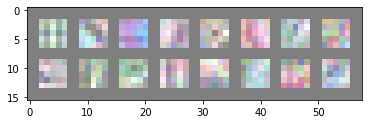

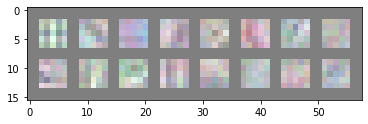

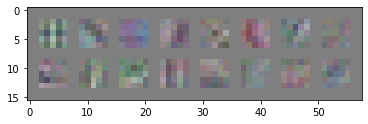

In [ ]:
from torchvision import datasets, transforms, utils
for x in convolutional_neural_network.modules():
    if isinstance(x, nn.Conv2d):
        imshow(utils.make_grid(x.weight.data.cpu(),normalize=True, scale_each=True))
        imshow(utils.make_grid(x.weight.data.cpu(),normalize=True))
        imshow(utils.make_grid(x.weight.data.cpu()))
        break

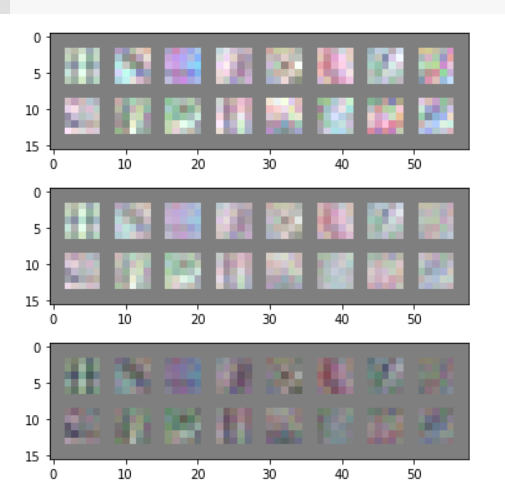